# SD Crime Stats!

### A notebook generated from the San Diego Police Department's 2021 Uniform Crime Report (UCR) data as found [here](https://www.sandiego.gov/police/data-transparency/crime-statistics/annual-crime-reports).


This is one of my first attempts at data visualization with matplotlib, seaborn, and scikitlearn. So be nice.



Most of this code is just copy/paste from various StackOverflow forums I do not care to cite. These data and this notebook are purely intended to entertain me as a hobbiest.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import distance_matrix
import sklearn as sklearn
import sklearn.metrics
from sklearn.decomposition import PCA
%matplotlib inline

## Import Data

In [ ]:
sdcrime2021 = pd.read_csv('./2021crime-rates.csv')

Force pandas to read the Neighborhood column as a string:

In [ ]:
sdcrime2021.Neighborhood = sdcrime2021.Neighborhood.astype(str)

## Create a 2021Crime DataFrame

Create a crime DataFrame, set the index of this DataFrame to be the name of each neighboorhood, and force all the numbers to be floats.

In [ ]:
sdcrime2021=sdcrime2021.set_index('Neighborhood')
for column in sdcrime2021.columns:
    sdcrime2021[column] = [float(str(i).replace(",", "")) for i in sdcrime2021[column]]

In [ ]:
sdcrime2021

## Now let's visualize! With a heatmap!

In [ ]:
fig = plt.figure()
ax1 = plt.subplots(figsize=(14.4, 40))
sns.heatmap(sdcrime2021)

### Pretty! But what is going on with Petco Park?!

In [ ]:
 ##
   ##
##explanation in progress##
    ####sdcrime2021.index

That doesn't look correct! From what I can gather from UCR's website, these data are unnormalized, raw counts of individual crimes. Since there were a total of [57 homicides reported by the police in San Diego county in 2021](https://www.sandiego.gov/sites/default/files/20220308_2021_crime_stats.pdf), it seems doubtful that Petco Park had "1,000.01" homicides...

Let's drop this data point and redo our heatmap!

In [ ]:
sdcrime2021_no_petco = sdcrime2021.drop(index='PETCO PARK')

## Crime Heatmap #2 - no Petco Park

In [ ]:
fig = plt.figure()
ax1 = plt.subplots(figsize=(14.4, 40))
sns.heatmap(sdcrime2021_no_petco)

This _No_Petco_Park_ heatmap looks a lot better! 

- There is clear seperation between high and low crime neighborhoods. 
- We're starting to see that tourist destinations like Mission Bay Park, Balboa Park, Gaslamp, Old Town, the Tijuana River Valley(?), and Qualcomm (stadium?) all seem to have higher crime rates than residential neighborhoods.
- The high crime rate in Mission Bay Park(i.e. Fiesta Island, Seaworld, resorts) in particular seems to be masking the signal from lower crime neighborhoods.

Let's see how the heatmap looks without Mission Bay Park...

### Let's see what happens when we drop Mission Bay Park from the heatmap.

## Crime Heatmap #3 - no Petco Park, no Mission Bay Park

In [ ]:
sdcrime2021_no_petco_mission_bay = sdcrime2021_no_petco.drop(index='MISSION BAY PARK')
fig = plt.figure()
ax1 = plt.subplots(figsize=(14.4, 40))
sns.heatmap(sdcrime2021_no_petco_mission_bay)

This would be better sorted. Let's sort by 'IDX TL Crime' (which I assume is a total crime index) and see!

## Crime Heatmap #4 - SORTED - no Petco Park, no Mission Bay Park

In [ ]:
sdcrime2021_no_petco_mission_bay = sdcrime2021_no_petco_mission_bay.sort_values(['IDX TL_CRIME'], ascending=False)
fig = plt.figure()
ax1 = plt.subplots(figsize=(14.4, 40))
sns.heatmap(sdcrime2021_no_petco_mission_bay)

## Let's dig a little deeper into some of my favorite SD neighborhoods

Create a list of my favorite neighborhoods

In [ ]:
fav_nbhoods = ['ADAMS NORTH', 'BARRIO LOGAN', 'BAY HO', 'BAY PARK',
                  'CLAIREMONT MESA WEST','EAST VILLAGE',
                  'GOLDEN HILL','HILLCREST', 
                  'KENSINGTON', 'LA JOLLA', 'LINCOLN PARK', 
                  'LINDA VISTA', 'LITTLE ITALY', 'LOGAN HEIGHTS', 
                  'MIDTOWN', 'MIRA MESA', 'MISSION HILLS', 
                  'MORENA', 'NORTH CLAIREMONT', 'NORTH PARK', 'OCEAN BEACH', 
                  'PACIFIC BEACH',  'SOUTH PARK','TIERRASANTA', 
                  'UNIVERSITY CITY', 'UNIVERSITY HEIGHTS']

Create an empty DataFrame. We will fill this with crime data from my favorite neighborhoods.

In [ ]:
fav_df = pd.DataFrame()

Iterate through the sdcrime2021 DataFrame adding my favorite neighborhoods to our new empty DataFrame.

In [ ]:
for hood in sdcrime2021.index:
    if hood in fav_nbhoods:
        fav_df[hood] = pd.DataFrame(sdcrime2021.loc[hood])
fav_df = fav_df.T

Again, let's sort by the total crime index, 'IDX TL_CRIME.'

In [ ]:
fav_df = fav_df.sort_values(by='IDX TL_CRIME', ascending=False)

Let's take a look at the crime in my favorite neighborhoods!

In [ ]:
fav_df

## Crime Heatmap #5 - SORTED - my favorite neighborhoods

In [ ]:
fig = plt.figure()
ax1 = plt.subplots(figsize=(14.4, 40))
sns.heatmap(fav_df)

## Within my favorite neighborhoods, let's look at car thefts only

In [ ]:
variable = 'THEFT_M.VEH'

fav_df = fav_df.sort_values(by=variable, ascending=False)
plt.xticks(rotation=75, fontsize=20)
plt.suptitle(variable, fontsize=30)
sns.set(rc={'figure.figsize':(25,10)})
sns.barplot(data=fav_df, x=fav_df.index, y=fav_df[variable])

# I want to visualize this with PCA!

## I don't think it'll help us mine this data much, idk, but I just want to play with PCA so buckle up.

In [ ]:
sdcrime2021_dist = pd.DataFrame(distance_matrix(sdcrime2021.values, sdcrime2021.values), index=sdcrime2021.index, columns=sdcrime2021.index)

In [ ]:
sdcrime2021_dist

In [ ]:
dist_2 = sklearn.metrics.pairwise_distances(sdcrime2021_no_petco_mission_bay.fillna(0), Y=None, metric='euclidean')

In [ ]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(sdcrime2021_dist)

In [ ]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2', 'PC3', 'PC4'], index=sdcrime2021_dist.index)

In [ ]:
principalDf

Specify which Principle Components to plot:

In [ ]:
PC_A = 'PC2'
PC_B = 'PC3'

In [ ]:
fig = plt.figure(figsize = (40,40))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel(PC_A, fontsize = 35)
ax.set_ylabel(PC_B, fontsize = 35)
ax.set_title('2 Component PCA', fontsize = 50)



cmap = np.arange(len(principalDf))
colors = cmap
ax.legend(nbhoods_df.index)
ax.grid()


for hood, color in zip(principalDf.index,colors):
    ax.scatter(principalDf[PC_A]
               , principalDf[PC_B]
               , c = colors
               , s = 40)


for i, hood in enumerate(principalDf.index):
    ax.annotate(hood,(principalDf[PC_A][i], principalDf[PC_B][i]))

# ~ DEPRECATED DEAD CODE SECTION ~

In [ ]:
sdcrime2021_log = sdcrime2021.apply(lambda x: np.log10(x) if np.issubdtype(x.dtype, np.number) else x)

In [ ]:
fig = plt.figure()
ax1 = plt.subplots(figsize=(14.4, 40))
sns.heatmap(sdcrime2021_log)

In [19]:
fav_df

,MURDER,RAPE,ARMED_ROBBERY,ST/ARM_ROBBERY,ASAULT_AGGRVD,CRM TL_VIOLENT,RESID_BURGLARY,NRESID_BURGLARY,TOTAL_BURGLARY,'$400+_THEFT,<$400_THEFT,TOTAL_THEFT,THEFT_M.VEH,CRM TL_PROPERTY,IDX TL_CRIME,PROWL_CAR
EAST VILLAGE,0.19,1.78,0.42,1.83,11.58,15.80,1.92,1.31,3.23,13.22,8.48,21.70,7.78,32.71,48.51,10.03
LITTLE ITALY,0.00,1.79,0.99,0.60,3.38,6.75,4.17,3.58,7.75,18.67,11.52,30.19,3.77,41.72,48.47,13.91
HILLCREST,0.05,0.81,0.86,1.08,6.37,9.18,2.75,1.84,4.59,13.39,10.85,24.24,5.24,34.06,43.24,10.04
OCEAN BEACH,0.00,0.47,0.67,0.67,6.35,8.16,1.34,0.60,1.94,10.30,6.55,16.85,6.35,25.14,33.30,6.09
MORENA,0.00,0.96,0.24,0.24,2.27,3.70,1.79,3.58,5.37,11.46,6.81,18.27,4.42,28.06,31.76,10.63
PACIFIC BEACH,0.02,0.51,0.40,0.42,3.83,5.18,2.11,1.18,3.30,11.40,5.86,17.25,5.98,26.54,31.72,6.45
LOGAN HEIGHTS,0.07,0.59,1.11,1.11,9.92,12.80,0.96,1.04,2.00,4.07,4.14,8.21,6.51,16.72,29.52,3.85
GOLDEN HILL,0.00,0.26,0.17,0.17,3.32,3.92,1.70,0.51,2.21,10.30,6.05,16.35,5.28,23.84,27.76,9.20
MIDTOWN,0.00,0.19,0.38,0.00,2.82,3.39,0.94,0.75,1.69,7.53,7.15,14.68,7.72,24.10,27.49,9.04
BARRIO LOGAN,0.25,0.57,0.82,0.66,7.13,9.43,0.57,1.72,2.30,4.59,4.51,9.10,6.23,17.62,27.05,3.77


## Crime Heatmap #5 - SORTED - my favorite neighborhoods

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

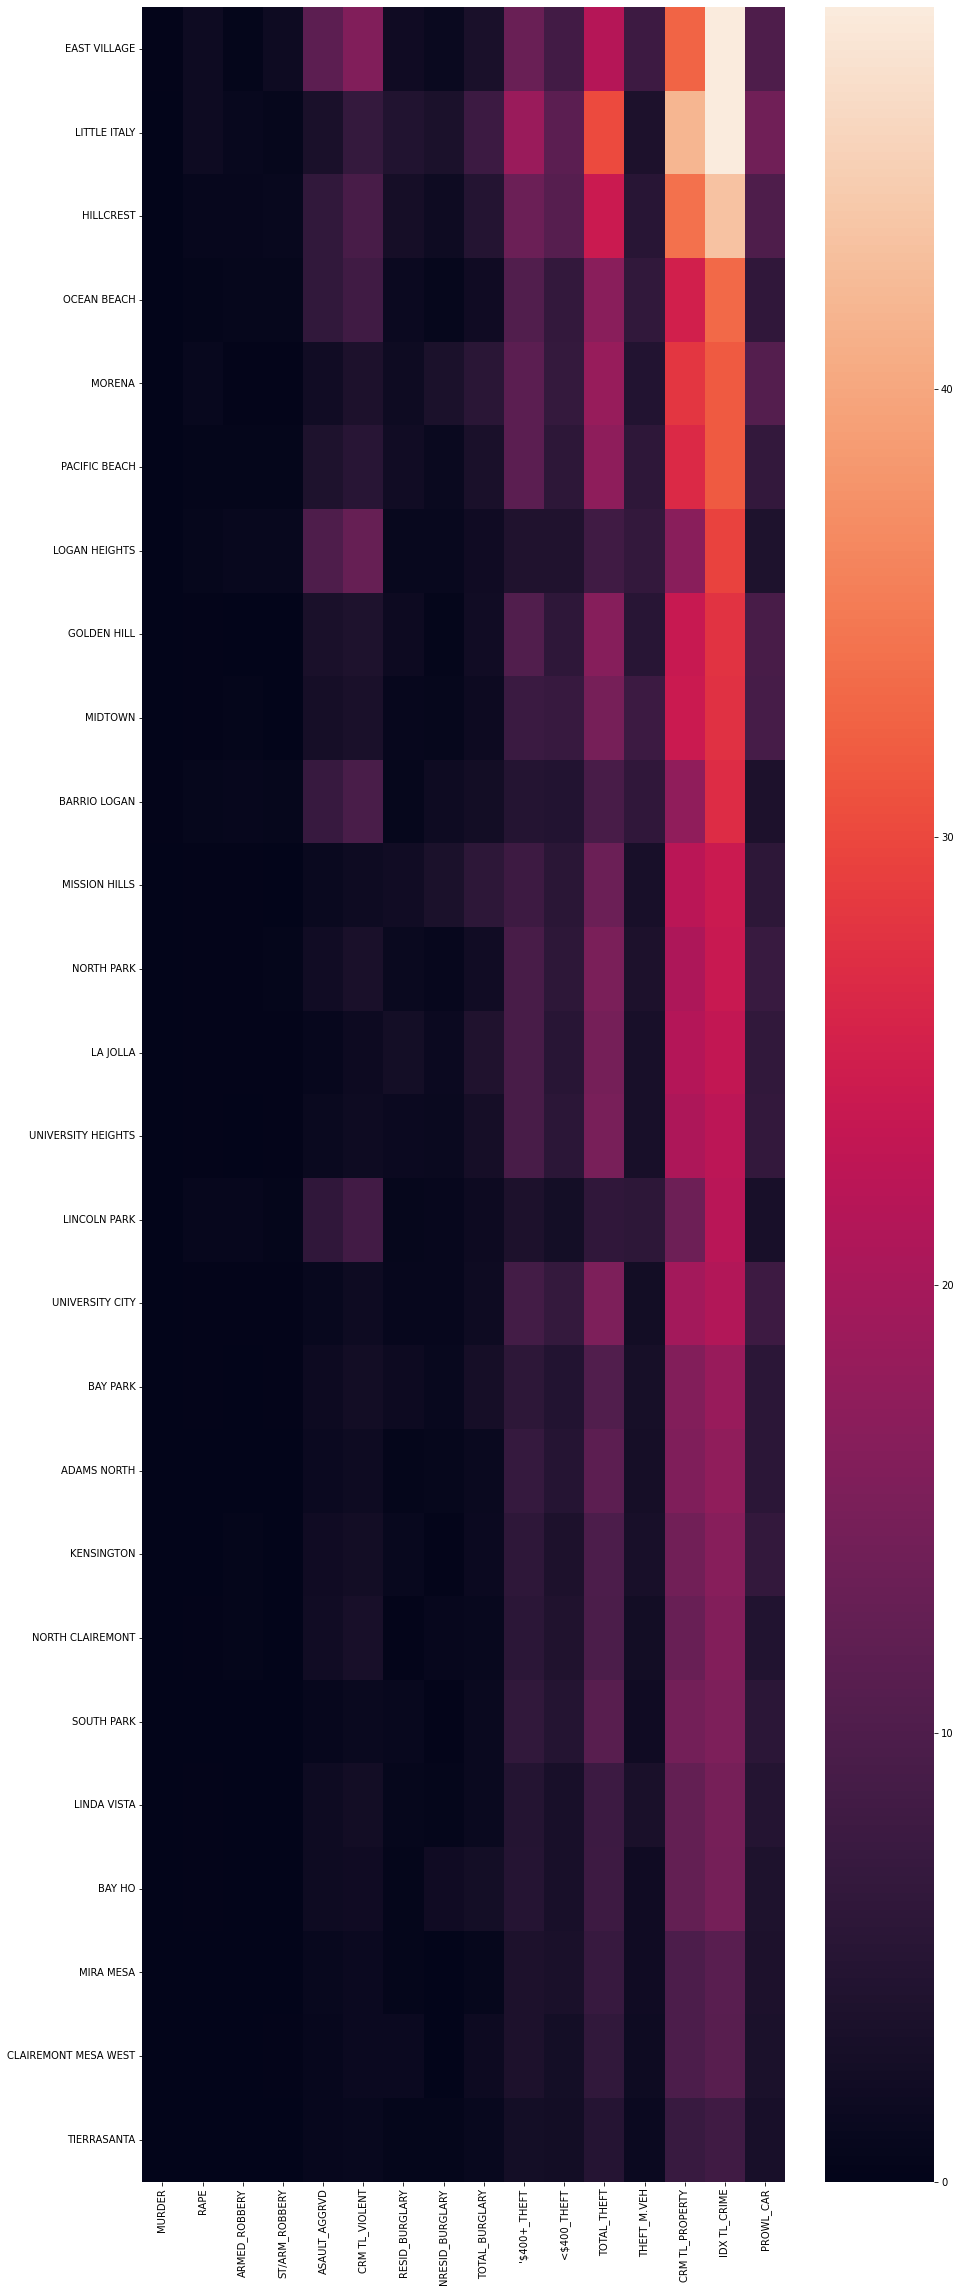

In [20]:
fig = plt.figure()
ax1 = plt.subplots(figsize=(14.4, 40))
sns.heatmap(fav_df)

## Within my favorite neighborhoods, let's look at car thefts only

<AxesSubplot:ylabel='THEFT_M.VEH'>

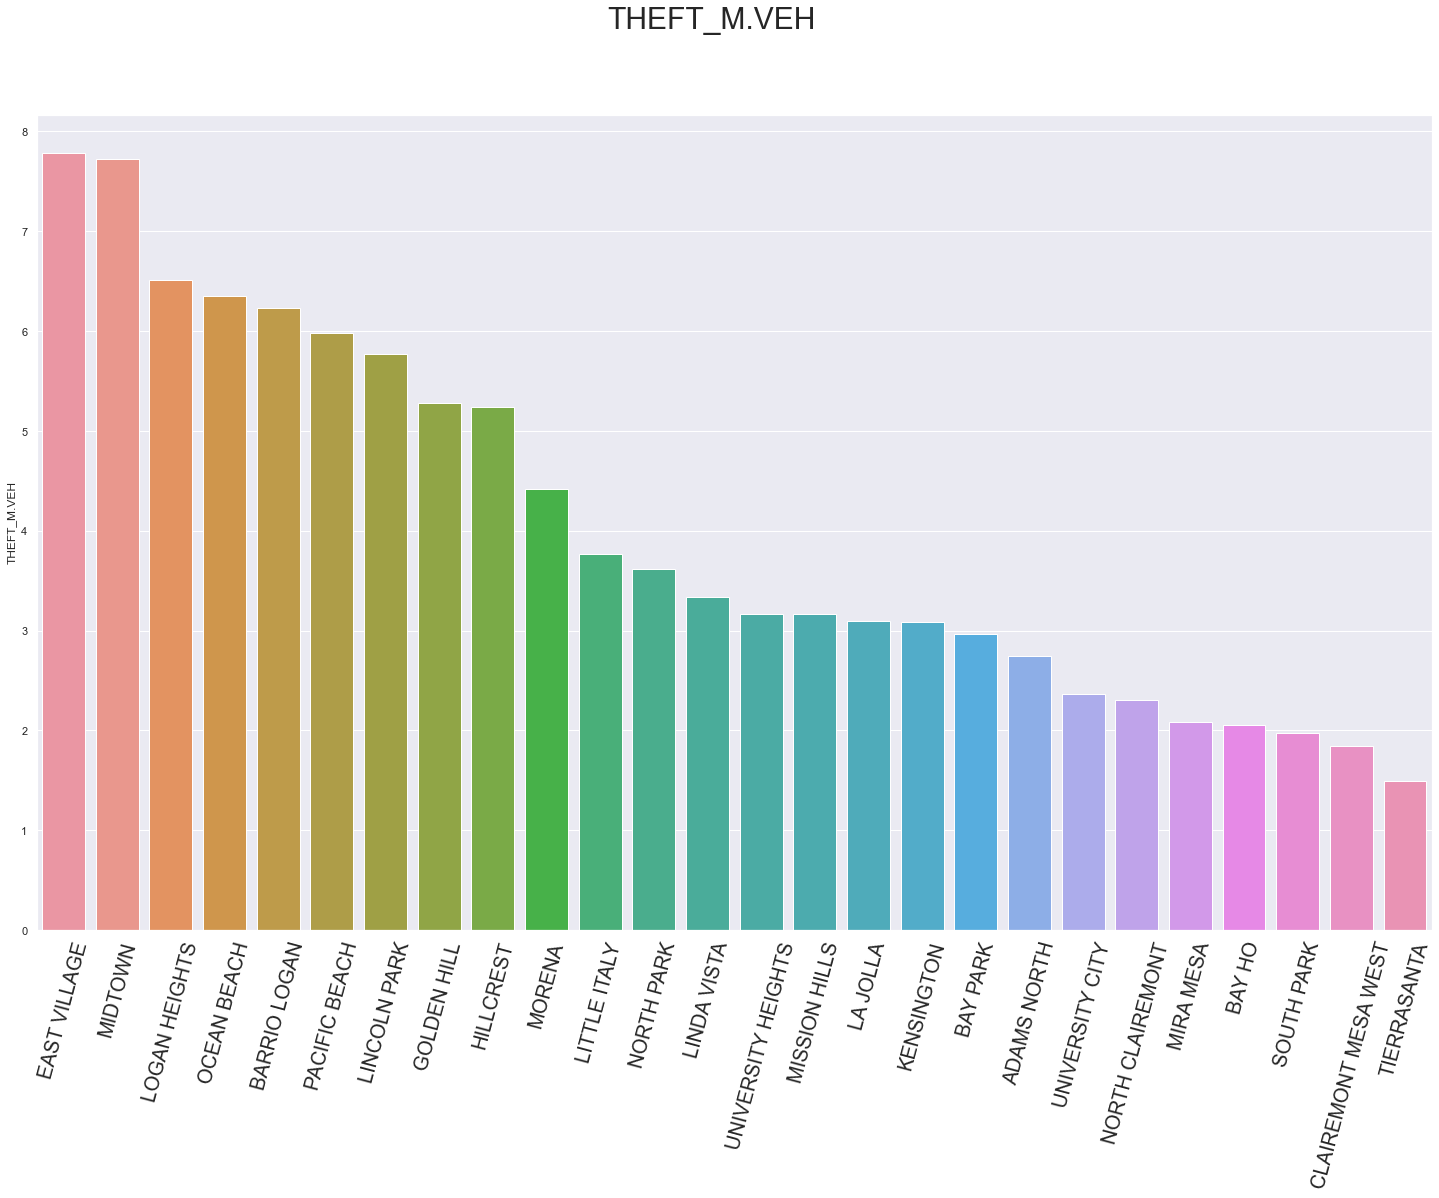

In [33]:
variable = 'THEFT_M.VEH'

fav_df = fav_df.sort_values(by=variable, ascending=False)
plt.xticks(rotation=75, fontsize=20)
plt.suptitle(variable, fontsize=30)
sns.set(rc={'figure.figsize':(25,10)})
sns.barplot(data=fav_df, x=fav_df.index, y=fav_df[variable])

# I want to visualize this with PCA!

## I don't think it'll help us mine this data much, idk, but I just want to play with PCA so buckle up.

In [48]:
sdcrime2021_dist = pd.DataFrame(distance_matrix(sdcrime2021.values, sdcrime2021.values), index=sdcrime2021.index, columns=sdcrime2021.index)

In [49]:
sdcrime2021_dist

Neighborhood,ADAMS NORTH,ALLIED GARDENS,ALTA VISTA,AZALEA/HOLLYWOOD PARK,BALBOA PARK,BARRIO LOGAN,BAY HO,BAY PARK,BAY TERRACES,BIRDLAND,...,TORREY HIGHLANDS,TORREY PINES,TORREY PRESERVE,UNIVERSITY CITY,UNIVERSITY HEIGHTS,VALENCIA PARK,WOODED AREA,UNKNOWN,SUB-TOTAL,GRAND TOTALS
Neighborhood,,,,,,,,,,,,,,,,,,,,,
ADAMS NORTH,0.000000,2.957110,21.186116,10.514927,419.339822,14.736855,6.815042,2.829611,16.159053,7.396540,...,17.965125,12.300756,28.252991,7.591548,8.559410,14.622760,6.752192,28.252991,8.209574,8.209574
ALLIED GARDENS,2.957110,0.000000,20.772145,9.761578,419.994178,14.820938,6.339424,2.235308,15.627434,8.247260,...,17.458391,11.945782,27.743792,8.652763,9.488751,14.160621,6.726143,27.743792,8.782221,8.782221
ALTA VISTA,21.186116,20.772145,0.000000,24.543822,439.609751,29.885404,15.321570,21.559058,6.047272,26.332620,...,3.859508,9.252832,7.466673,28.576800,29.611481,17.406786,14.878938,7.466673,28.447868,28.447868
AZALEA/HOLLYWOOD PARK,10.514927,9.761578,24.543822,0.000000,416.511894,7.072029,11.635184,8.554613,18.704622,8.745713,...,21.997259,17.260049,31.511541,13.426329,12.621181,10.393238,13.379993,31.511541,8.659977,8.659977
BALBOA PARK,419.339822,419.994178,439.609751,416.511894,0.000000,410.927627,424.971161,418.880192,434.142125,413.454695,...,436.786256,431.243704,446.989777,412.474000,411.392777,424.763836,425.957626,446.989777,411.717564,411.717564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VALENCIA PARK,14.622760,14.160621,17.406786,10.393238,424.763836,14.253147,10.805170,13.408490,12.221518,15.249226,...,15.981051,13.190932,24.034413,20.579531,20.475688,0.000000,13.141035,24.034413,17.189968,17.189968
WOODED AREA,6.752192,6.726143,14.878938,13.379993,425.957626,18.889717,3.983378,7.611281,10.149616,13.184874,...,11.603318,6.155623,21.747009,14.103996,15.044680,13.141035,0.000000,21.747009,14.460360,14.460360
UNKNOWN,28.252991,27.743792,7.466673,31.511541,446.989777,37.003262,22.328056,28.613022,13.037235,33.659758,...,10.449182,16.084119,0.000000,35.607661,36.601473,24.034413,21.747009,0.000000,35.624452,35.624452


In [79]:
dist_2 = sklearn.metrics.pairwise_distances(sdcrime2021_no_petco_mission_bay.fillna(0), Y=None, metric='euclidean')

In [97]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(sdcrime2021_dist)

In [100]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2', 'PC3', 'PC4'], index=sdcrime2021_dist.index)

In [101]:
principalDf

,PC1,PC2,PC3,PC4
Neighborhood,,,,
ADAMS NORTH,-16678.963722,-146.759020,56.291025,11.990475
ALLIED GARDENS,-16678.269619,-149.198359,58.455747,15.087406
ALTA VISTA,-16555.709113,-186.462317,100.235384,99.062093
AZALEA/HOLLYWOOD PARK,-16675.725398,-134.401713,43.643143,-5.287188
BALBOA PARK,-12648.818824,1440.253025,-477.708186,265.024472
...,...,...,...,...
VALENCIA PARK,-16637.367520,-156.057659,67.950017,40.571331
WOODED AREA,-16659.115202,-166.343614,77.522802,50.646239
UNKNOWN,-16482.088344,-189.116225,103.116916,106.785356


Specify which Principle Components to plot:

In [129]:
PC_A = 'PC2'
PC_B = 'PC3'

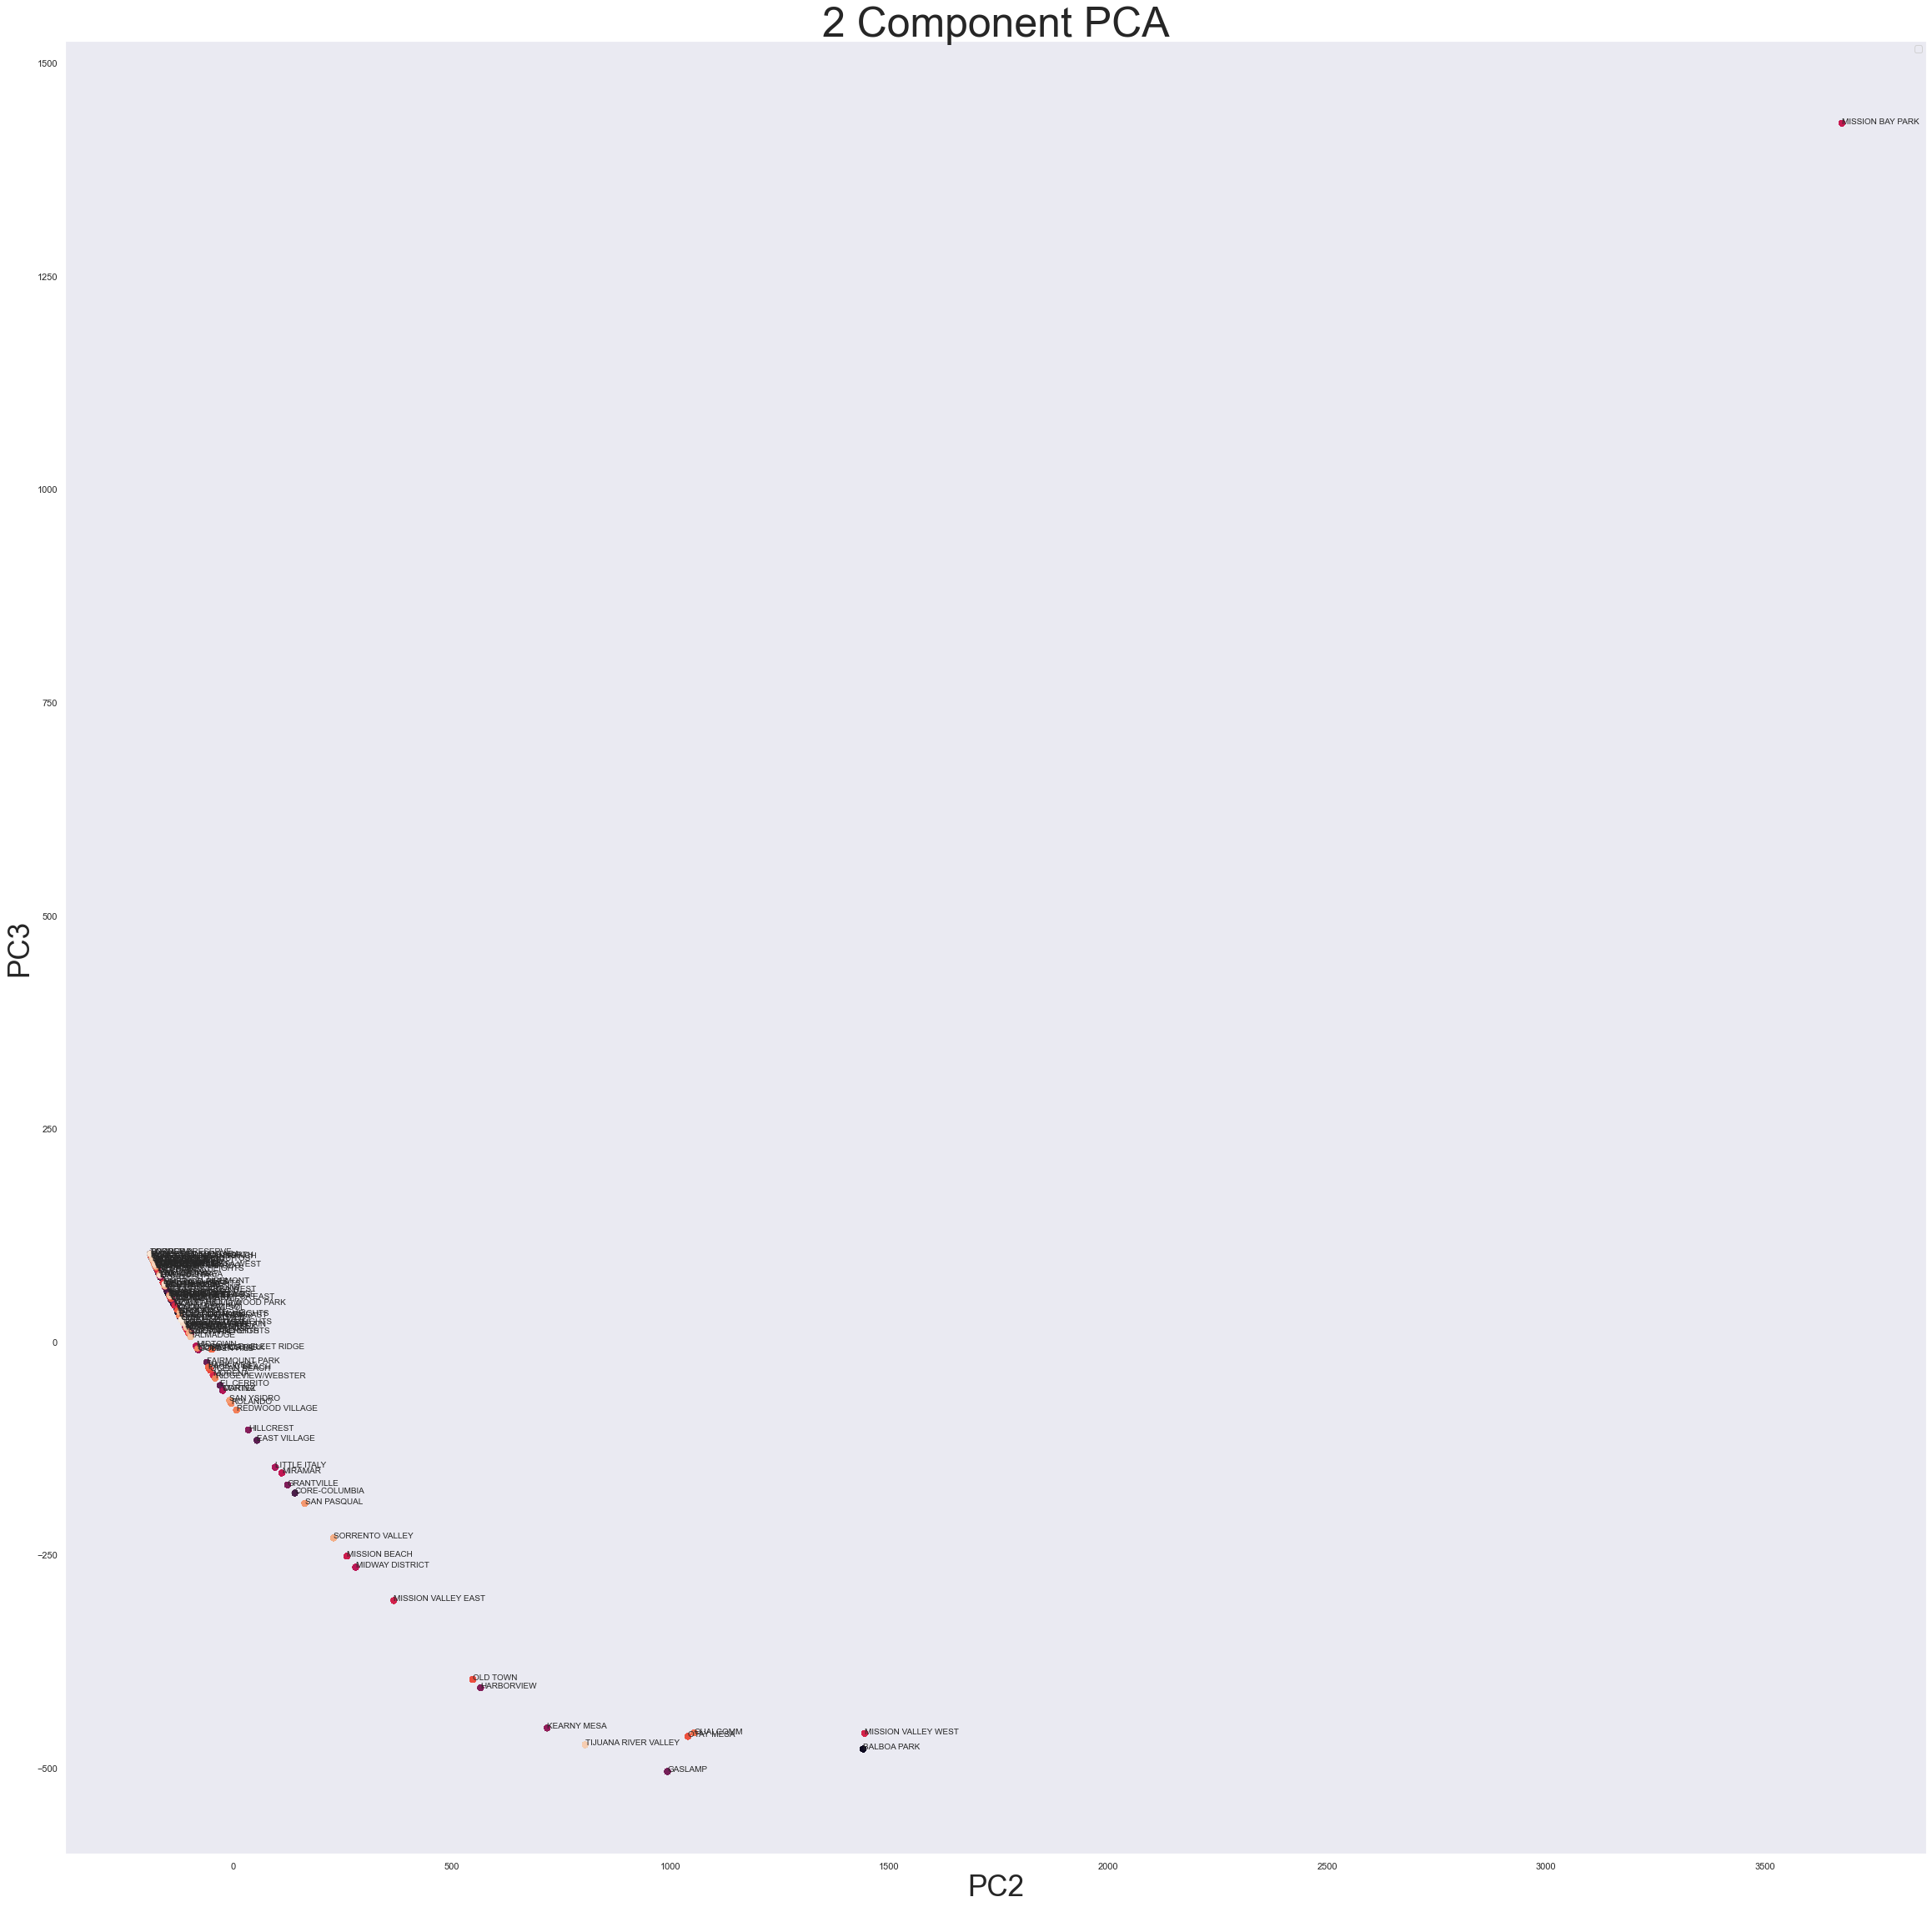

In [130]:
fig = plt.figure(figsize = (40,40))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel(PC_A, fontsize = 35)
ax.set_ylabel(PC_B, fontsize = 35)
ax.set_title('2 Component PCA', fontsize = 50)



cmap = np.arange(len(principalDf))
colors = cmap
ax.legend(nbhoods_df.index)
ax.grid()


for hood, color in zip(principalDf.index,colors):
    ax.scatter(principalDf[PC_A]
               , principalDf[PC_B]
               , c = colors
               , s = 40)


for i, hood in enumerate(principalDf.index):
    ax.annotate(hood,(principalDf[PC_A][i], principalDf[PC_B][i]))

# ~ DEPRECATED DEAD CODE SECTION ~

In [ ]:
sdcrime2021_log = sdcrime2021.apply(lambda x: np.log10(x) if np.issubdtype(x.dtype, np.number) else x)

In [ ]:
fig = plt.figure()
ax1 = plt.subplots(figsize=(14.4, 40))
sns.heatmap(sdcrime2021_log)